
### Examining racial discrimination in the US job market

#### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

#### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes.

#### Exercise
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Discuss statistical significance.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [3]:
data = pd.io.stata.read_stata('us_job_market_discrimination.dta')

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1,0,1,0,0,0,0,0,0,
1,b,1,3,3,6,0,1,1,0,316,...,1,0,1,0,0,0,0,0,0,
2,b,1,4,1,6,0,0,0,0,19,...,1,0,1,0,0,0,0,0,0,
3,b,1,3,4,6,0,1,0,1,313,...,1,0,1,0,0,0,0,0,0,
4,b,1,3,3,22,0,0,0,0,313,...,1,1,0,0,0,0,0,1,0,Nonprofit


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4870 entries, 0 to 4869
Data columns (total 65 columns):
id                    4870 non-null object
ad                    4870 non-null object
education             4870 non-null int8
ofjobs                4870 non-null int8
yearsexp              4870 non-null int8
honors                4870 non-null int8
volunteer             4870 non-null int8
military              4870 non-null int8
empholes              4870 non-null int8
occupspecific         4870 non-null int16
occupbroad            4870 non-null int8
workinschool          4870 non-null int8
email                 4870 non-null int8
computerskills        4870 non-null int8
specialskills         4870 non-null int8
firstname             4870 non-null object
sex                   4870 non-null object
race                  4870 non-null object
h                     4870 non-null float32
l                     4870 non-null float32
call                  4870 non-null float32
city        

In [6]:
# number of callbacks for balck-sounding names
sum(data[data.race=='b'].call)

157.0

In [9]:
data_ = data[['race', 'call']]
data_

,race,call
0,w,0
1,w,0
2,b,0
3,b,0
4,w,0
5,w,0
6,w,0
7,b,0
8,b,0
9,b,0


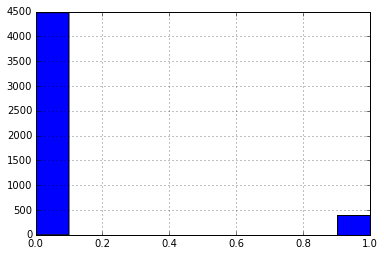

In [14]:
%matplotlib inline
data_['call'].hist()

In [29]:
data_.groupby(data_.call == 1).size()

call
False    4478
True      392
dtype: int64

In [22]:
data_.groupby(data_.race == 'b').size()

race
False    2435
True     2435
dtype: int64

In [23]:
data_.groupby((data_.race == 'b') & (data_.call == 1)).size()

False    4713
True      157
dtype: int64

In [33]:
data_.groupby((data_.race == 'b') & (data_.call == 0)).size()

False    2592
True     2278
dtype: int64

In [24]:
data_.groupby(data_.race == 'w').size()

race
False    2435
True     2435
dtype: int64

In [25]:
data_.groupby((data_.race == 'w') & (data_.call == 1)).size()

False    4635
True      235
dtype: int64

In [34]:
data_.groupby((data_.race == 'w') & (data_.call == 0)).size()

False    2670
True     2200
dtype: int64

Answer for question 1: Chi-Square Test is appropriate for this problem. The CLT applys to this problem.

Answer for question 2: 

Null Hypothesis, H0: race and call are independent

Alternative Hypothesis, HA: race and call are not independent

Formulate an Analysis Plan:

We choose confidence level to be 95%, and we will do Chi-Square Test for indenpence.

Analyze Sample Data:

Degree of Freedom

In [27]:
#For race categorical variable, we know there are two levels, 'b' and 'w'
#For call categorical variable, we know there are two levels, 1 and 0

r = 2
c = 2

DF = (r - 1) * (c - 1)
DF

1

In [32]:
# Calculate the Expected frequencies
nb = 2435
nw = 2435
n0 = 4478
n1 = 392
n = 4870

E0b = (nb * n0) / n
E0w = (nw * n0) / n
E1b = (nb * n1) / n
E1w = (nw * n1) / n

print E0b
print E0w
print E1b
print E1w

2239
2239
196
196


In [36]:
# Obtain the observed frequencies
O0b = 2278
O0w = 2200
O1b = 157
O1w = 235

In [37]:
# Calculate the Test statistic

Square_of_X = (O0b - E0b) ** 2 / E0b + (O0w - E0w) ** 2 / E0w + (O1b - E1b) ** 2 / E1b + (O1w - E1w) ** 2 / E1w
print Square_of_X

14


From the test statistic, we get the P-Value is 0.000183. The result is significant at p < 0.05. 

Answer for question 3: 

since this is chi-square test for two categorical variables, we don't calcuate the margin of error and confidence interval. We use the confidence level of 95%.

Answer for question 4: 

we choose the significane level to be 0.05. Since the P-value is smaller than the significance level. We reject H0 and accept HA. 

We get the conclusion that race has a significant impact on the rate of callbacks for resumes.